In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

In [2]:
from numpy.linalg import norm

In [3]:
# make random test data
frame0 = np.random.rand(2, 640) * 512
frame1 = np.random.rand(2, 600) * 512
frames = (frame0, frame1)

<IPython.core.display.Javascript object>


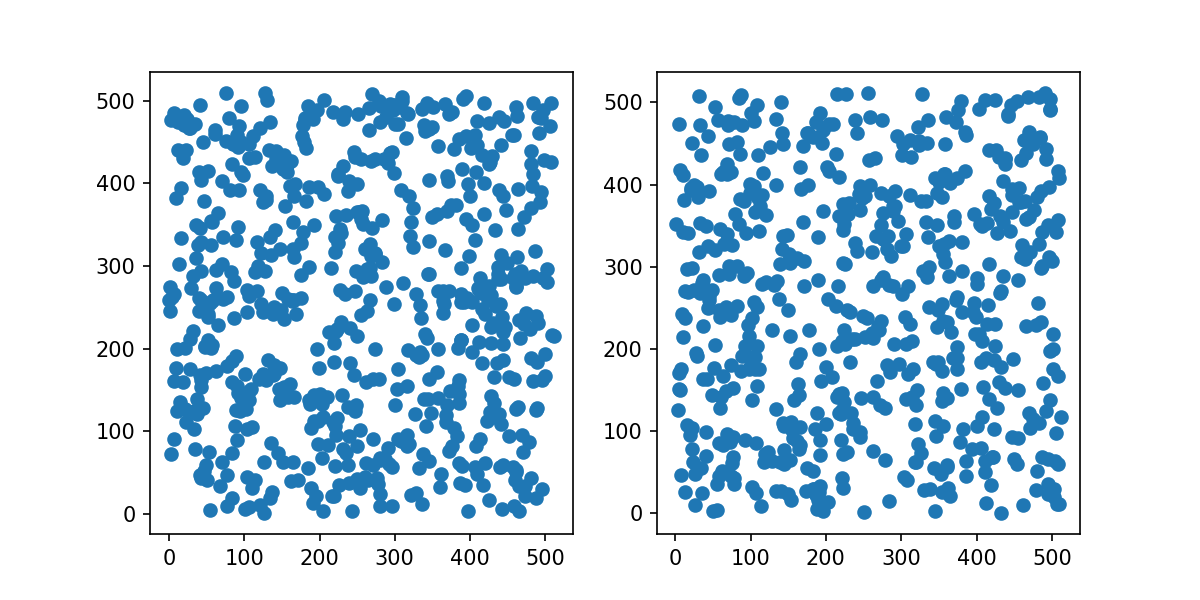

In [4]:
fig, axs = plt.subplots(1, len(frames), figsize=(4 * len(frames), 4))
for ax, frame in zip(axs, frames):
    ax.scatter(frame[1], frame[0])

In [5]:
def gleb_meth(frames, radius):
    d = np.array([np.subtract.outer(*coords) for coords in zip(*frames)])
    r = norm(d, axis=0)
    return np.argwhere(r < radius)

In [6]:
from scipy.spatial import cKDTree

In [7]:
def kd_meth(frames, radius):
    frame0, frame1 = frames
    t0 = cKDTree(frame0.T)
    t1 = cKDTree(frame1.T)
    pair_matches = t0.query_ball_tree(t1, radius)
    # take only the first match
    return np.array([(i, p) for i, pair in enumerate(pair_matches) for p in pair if len(pair)])

In [10]:
def plot_frames(frames, radius):
    group_gleb = gleb_meth(frames, radius)
    group_kd = kd_meth(frames, radius)
    gleb_pairs = [np.array([frame[:,pair] for frame, pair in zip(frames, pairs)]).T for pairs in group_gleb]
    kd_pairs = [np.array([frame[:,pair] for frame, pair in zip(frames, pairs)]).T for pairs in group_kd]
    fig, axs = plt.subplots(1, len(frames), figsize=(4 * len(frames), 4))
    for ax, pairs in zip(axs, (gleb_pairs, kd_pairs)):
        for i, (frame_y, frame_x) in enumerate(frames):
            ax.scatter(frame_x, frame_y, s=2, label="Frame {}".format(i))
        for pair_y, pair_x in pairs:
            ax.scatter(pair_x, pair_y)
            y, x = pair_y.mean(), pair_x.mean()
            c = plt.Circle((x, y), radius=radius, color='c', linewidth=3,
               fill=False)
            ax.add_patch(c)
    ax.legend(loc="best")

<IPython.core.display.Javascript object>


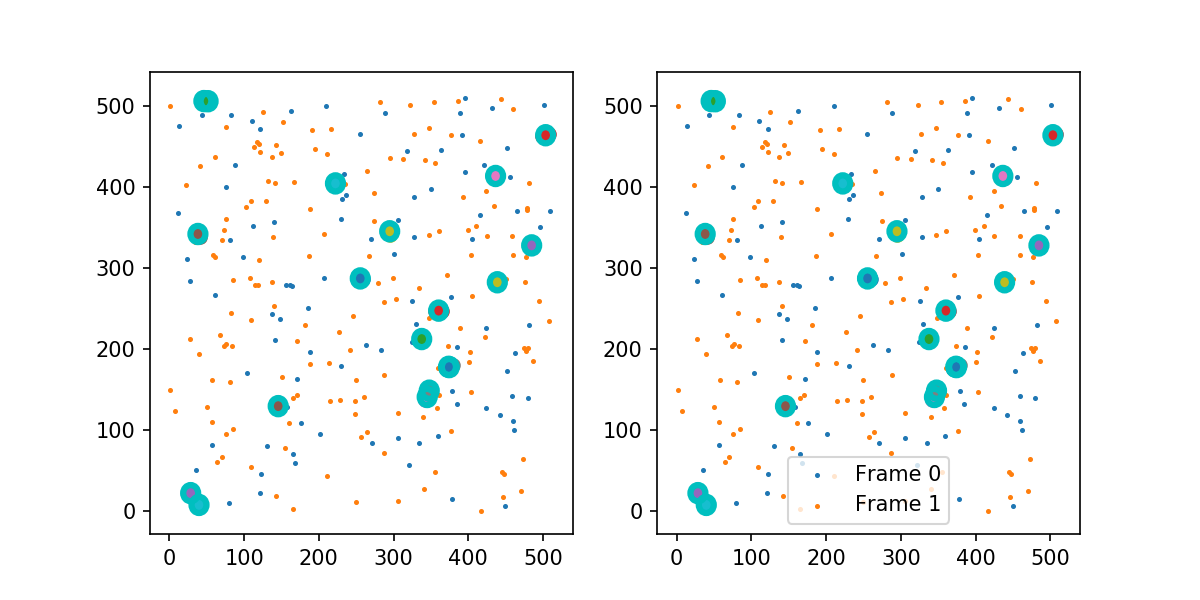

In [11]:
frame0 = np.random.rand(2, np.random.randint(500)) * 512
frame1 = np.random.rand(2, np.random.randint(500)) * 512
frames = (frame0, frame1)
plot_frames(frames, 10)

In [12]:
for i in range(100):
    frame0 = np.random.rand(2, np.random.randint(1, 2000)) * 512
    frame1 = np.random.rand(2, np.random.randint(1, 2000)) * 512
    frames = (frame0, frame1)
    r = np.random.rand() * 100
    g = gleb_meth(frames, r)
    kd = kd_meth(frames, r)
    if kd.size or g.size:
        assert np.array_equal(g, kd)

In [13]:
import tqdm

In [12]:
all_speed_ups = []
for r in tqdm.tqdm_notebook(range(1, 11)):
    speed_up = []
    num_peaks = []
    for i in tqdm.tqdm_notebook(range(50, 501, 50)):
        frame0 = np.random.rand(2, i) * 512
        frame1 = np.random.rand(2, i) * 512
        frames = (frame0, frame1)
        print("For", frame0.shape[1], "peaks and a grouping radius of", r,"...")
        print("time for Gleb ...", end="")
        g = %timeit -n10 -o gleb_meth(frames, r)
        print("time for KD ...", end="")
        kd = %timeit -n10 -o kd_meth(frames, r)
        num_peaks.append(i)
        speed_up.append((np.mean(g.all_runs) / g.loops) / (np.mean(kd.all_runs) / kd.loops))
        print("speed up is (Gleb / KD)", speed_up[-1])
    plt.plot(num_peaks, speed_up, label=r)
    all_speed_ups.append(speed_up)
plt.xlabel("Number of simulated peaks")
plt.ylabel("Speed up")
plt.legend(title="Grouping radius")
plt.savefig("Comparison.png")

A Jupyter Widget

A Jupyter Widget

For 50 peaks and a grouping radius of 1 ...
time for Gleb ...95.7 µs ± 11 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...86.7 µs ± 10.5 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 1.10352288863
For 100 peaks and a grouping radius of 1 ...
time for Gleb ...202 µs ± 15.3 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...135 µs ± 10.8 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 1.48881097693
For 150 peaks and a grouping radius of 1 ...
time for Gleb ...367 µs ± 22.2 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...153 µs ± 13.1 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 2.38999579334
For 200 peaks and a grouping radius of 1 ...
time for Gleb ...586 µs ± 21.9 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...216 µs ± 11.6 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb /

A Jupyter Widget

For 50 peaks and a grouping radius of 2 ...
time for Gleb ...98 µs ± 12.9 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...81.7 µs ± 10.1 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 1.19931123547
For 100 peaks and a grouping radius of 2 ...
time for Gleb ...195 µs ± 10.8 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...117 µs ± 10.2 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 1.66381081216
For 150 peaks and a grouping radius of 2 ...
time for Gleb ...355 µs ± 18.8 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...160 µs ± 14.5 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 2.21211345859
For 200 peaks and a grouping radius of 2 ...
time for Gleb ...565 µs ± 20.4 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...217 µs ± 11.6 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb /

A Jupyter Widget

For 50 peaks and a grouping radius of 3 ...
time for Gleb ...84.4 µs ± 11.6 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...82.9 µs ± 9.38 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 1.01868629672
For 100 peaks and a grouping radius of 3 ...
time for Gleb ...193 µs ± 13.3 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...120 µs ± 10.1 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 1.61656938245
For 150 peaks and a grouping radius of 3 ...
time for Gleb ...358 µs ± 25.4 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...159 µs ± 10.6 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 2.24850045998
For 200 peaks and a grouping radius of 3 ...
time for Gleb ...584 µs ± 10.6 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...231 µs ± 17 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb /

A Jupyter Widget

For 50 peaks and a grouping radius of 4 ...
time for Gleb ...85.3 µs ± 11.3 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...84.9 µs ± 9.96 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 1.0041427881
For 100 peaks and a grouping radius of 4 ...
time for Gleb ...190 µs ± 13.4 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...121 µs ± 10.8 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 1.56958900131
For 150 peaks and a grouping radius of 4 ...
time for Gleb ...358 µs ± 20.5 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...161 µs ± 12.9 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 2.23107278574
For 200 peaks and a grouping radius of 4 ...
time for Gleb ...564 µs ± 18.6 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...234 µs ± 12.2 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb 

A Jupyter Widget

For 50 peaks and a grouping radius of 5 ...
time for Gleb ...86.7 µs ± 12.3 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...83.8 µs ± 7.93 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 1.03462749213
For 100 peaks and a grouping radius of 5 ...
time for Gleb ...192 µs ± 12.5 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...121 µs ± 10 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 1.57926534558
For 150 peaks and a grouping radius of 5 ...
time for Gleb ...353 µs ± 14.5 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...181 µs ± 12.3 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 1.94855794102
For 200 peaks and a grouping radius of 5 ...
time for Gleb ...564 µs ± 14.2 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...238 µs ± 11.7 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb /

A Jupyter Widget

For 50 peaks and a grouping radius of 6 ...
time for Gleb ...86.5 µs ± 12.5 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...84.8 µs ± 9.55 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 1.02048017713
For 100 peaks and a grouping radius of 6 ...
time for Gleb ...192 µs ± 11.3 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...124 µs ± 9.82 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 1.55287710159
For 150 peaks and a grouping radius of 6 ...
time for Gleb ...355 µs ± 20.6 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...167 µs ± 11.3 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 2.12708018154
For 200 peaks and a grouping radius of 6 ...
time for Gleb ...564 µs ± 17.9 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...234 µs ± 11.9 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb

A Jupyter Widget

For 50 peaks and a grouping radius of 7 ...
time for Gleb ...85.4 µs ± 11.6 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...94.4 µs ± 9.3 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 0.904578492887
For 100 peaks and a grouping radius of 7 ...
time for Gleb ...190 µs ± 12.2 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...126 µs ± 11.3 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 1.50965879998
For 150 peaks and a grouping radius of 7 ...
time for Gleb ...353 µs ± 18.8 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...169 µs ± 12.1 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 2.08616269401
For 200 peaks and a grouping radius of 7 ...
time for Gleb ...558 µs ± 22.3 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...241 µs ± 11 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb /

A Jupyter Widget

For 50 peaks and a grouping radius of 8 ...
time for Gleb ...85.4 µs ± 11.1 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...91.8 µs ± 10.3 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 0.930274173964
For 100 peaks and a grouping radius of 8 ...
time for Gleb ...191 µs ± 11.2 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...136 µs ± 13.6 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 1.4089690365
For 150 peaks and a grouping radius of 8 ...
time for Gleb ...374 µs ± 25.1 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...176 µs ± 12.5 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 2.12387259959
For 200 peaks and a grouping radius of 8 ...
time for Gleb ...561 µs ± 14.2 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...249 µs ± 9.49 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb

A Jupyter Widget

For 50 peaks and a grouping radius of 9 ...
time for Gleb ...85.2 µs ± 10.2 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...89.2 µs ± 9.44 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 0.955552633309
For 100 peaks and a grouping radius of 9 ...
time for Gleb ...192 µs ± 11.9 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...136 µs ± 9.97 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 1.40894995262
For 150 peaks and a grouping radius of 9 ...
time for Gleb ...356 µs ± 18.7 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...176 µs ± 11 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 2.02774717019
For 200 peaks and a grouping radius of 9 ...
time for Gleb ...567 µs ± 24.6 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...263 µs ± 12 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / 

A Jupyter Widget

For 50 peaks and a grouping radius of 10 ...
time for Gleb ...85.3 µs ± 10.4 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...89 µs ± 10.1 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 0.958747940692
For 100 peaks and a grouping radius of 10 ...
time for Gleb ...197 µs ± 11.5 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...141 µs ± 11.1 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 1.39926770409
For 150 peaks and a grouping radius of 10 ...
time for Gleb ...356 µs ± 17.8 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...189 µs ± 8.17 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (Gleb / KD) 1.88201220457
For 200 peaks and a grouping radius of 10 ...
time for Gleb ...565 µs ± 24.6 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
time for KD ...267 µs ± 15.4 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
speed up is (G

In [15]:
fig, ax = plt.subplots()
ax.plot(all_speed_ups)

<IPython.core.display.Javascript object>

NameError: name 'all_speed_ups' is not defined

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.array(all_speed_ups).T)

In [ ]:
fig.savefig("Comparison.png")

In [16]:
%timeit t0 = cKDTree(frame0.T)
%timeit t1 = cKDTree(frame1.T)

72.5 µs ± 484 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
69.5 µs ± 608 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


---
# Split

In [14]:
import pandas as pd

## Testing groupby mutability

In [15]:
df_temp = pd.DataFrame(np.random.randint(3, size=(10, 3)), columns=["A", "B", "C"])
df_temp

,A,B,C
0,0,0,0
1,0,1,0
2,1,2,0
3,1,0,0
4,1,2,1
5,1,0,0
6,0,1,2
7,2,2,1
8,0,2,0
9,2,1,2


In [16]:
for name, group in df_temp.groupby("A"):
    print(name)
    print(group)
    df_temp.C.loc[group.index] = 1
df_temp

0
   A  B  C
0  0  0  0
1  0  1  0
6  0  1  2
8  0  2  0
1
   A  B  C
2  1  2  0
3  1  0  0
4  1  2  1
5  1  0  0
2
   A  B  C
7  2  2  1
9  2  1  2


,A,B,C
0,0,0,1
1,0,1,1
2,1,2,1
3,1,0,1
4,1,2,1
5,1,0,1
6,0,1,1
7,2,2,1
8,0,2,1
9,2,1,1


In [17]:
import warnings

In [71]:
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [176]:
# add column of group ids
def kd_meth(frames, radius):
    frame0, frame1 = frames
    t0 = cKDTree(frame0)
    t1 = cKDTree(frame1)
    pair_matches = t0.query_ball_tree(t1, radius)
    # return only the closest match.
    
    def closest_match(m, i):
        if len(m) == 1:
            return [i, m[0]]
        elif len(m) == 0:
            raise RuntimeError
        distances = ((t0.data[i] - t1.data[m])**2).sum(1)
        return [i, m[distances.argmin()]]
    
    pair_matches = [closest_match(m, i) for i, m in enumerate(pair_matches) if len(m)]
    return pair_matches

In [72]:
from IPython.core.debugger import Pdb

In [303]:
# iterate through groups updating original df

def group(df, radius, gap=10):
    new_df_list = []
    for frame, peaks in df.groupby("frame"):
        peaks = peaks.copy()
        # set/reset group_id
        peaks["group_id"] = -1
        if frame == 0:
            # group_id will be the index of the first peak
            # make holder df for groups with extra "group lifetime" column (df_cache)
            df_cache = peaks
            df_cache.loc[peaks.index, "group_id"] = df_cache.index
            new_df_list.append(df_cache.copy())
            continue
        # search for matches
        matches = kd_meth([df_cache[["y", "x"]].values, peaks[["y", "x"]].values], radius)
        # get indices
        # need to deal with overlaps (two groups claim same peak)
        try:
            # we don't want more than one match per cached peak.
            cache_idx, peaks_idx = np.array([[df_cache.index[i], peaks.index[m]] for i, m in matches]).T
        except ValueError as e:
            print(e)
        else:
            # update groups, only with unique peaks
            # doesn't take into account amp or anything
            # need better logic to deal with this scenario: should choose closer one.
            # need to use .values, because list results in DF
            peaks.loc[peaks_idx, "group_id"] = df_cache.loc[cache_idx, "group_id"].values
        # ungrouped peaks get their own group_id
        peaks.group_id.where((peaks.group_id != -1), peaks.index, inplace=True)
        # peaks.loc[(peaks.group_id != -1), "group_id"] = peaks.index
        # update df_cache and lifetimes
        df_cache = pd.concat((df_cache, peaks))
        df_cache = df_cache.drop_duplicates("group_id", "last")
        df_cache = df_cache[(frame - df_cache.frame) < gap]
        new_df_list.append(peaks)
    return pd.concat(new_df_list)

In [291]:
num_peaks_per_frame = 2000
frames = 1000
num_peaks = frames * num_peaks_per_frame
df = pd.DataFrame(dict(x=np.random.rand(num_peaks) * 512,
                       y=np.random.rand(num_peaks) * 512,
                       frame=np.random.randint(frames, size=num_peaks)
                      )).sort_values("frame").reset_index(drop=True)
print("Total number of peaks", num_peaks_per_frame*frames)
df["group_id"] = -1

Total number of peaks 2000000


In [304]:
%lprun -f group group(df, 1)

<IPython.core.display.Javascript object>


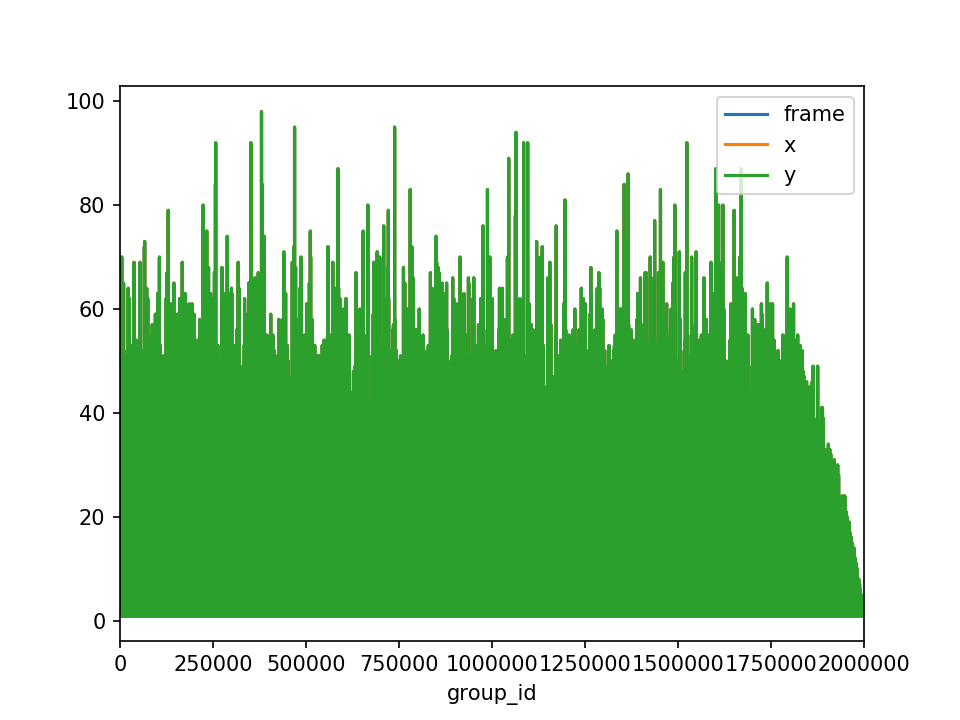

In [300]:
df = group(df, 100)
df.groupby("group_id").count().plot()

<IPython.core.display.Javascript object>


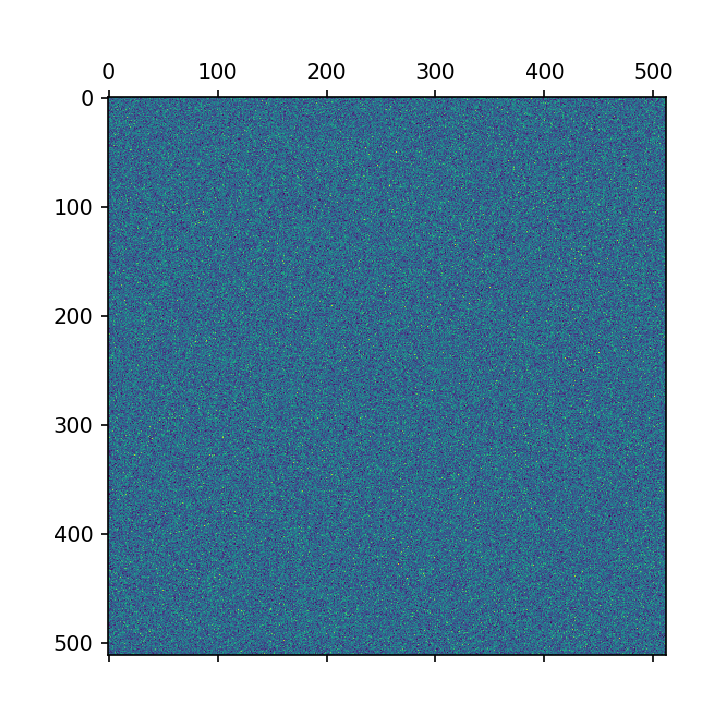

In [301]:
plt.matshow(np.histogramdd(df[["y", "x"]].values,bins=512)[0])

<IPython.core.display.Javascript object>


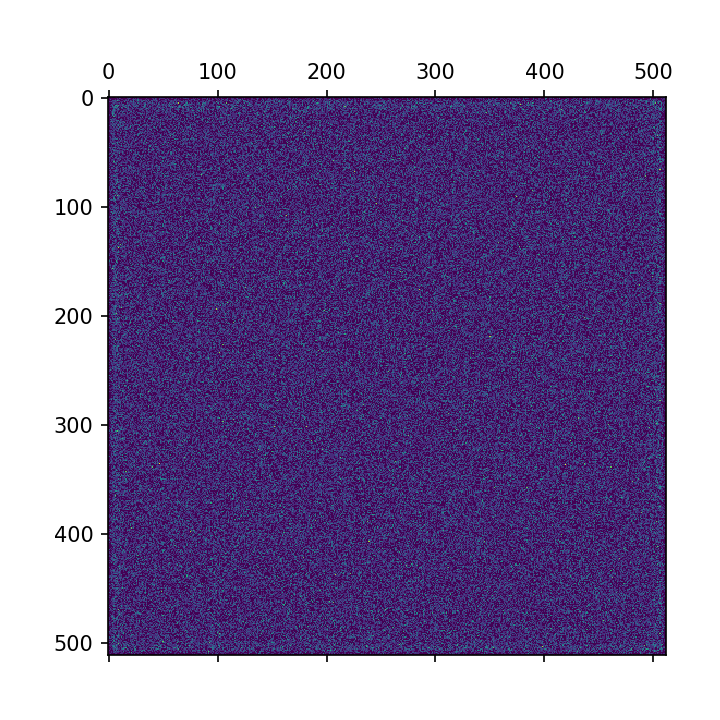

In [302]:
plt.matshow(np.histogramdd(df.groupby("group_id")[["y", "x"]].mean().values,bins=512)[0])

In [456]:
junk = pd.DataFrame(np.random.randn(1000000, 3))

In [457]:
to_change = junk[0] < 0
%timeit junk[1].where(~to_change, np.nan)
%timeit junk.loc[to_change, 1] = np.nan
%timeit junk.at[to_change, 1] = np.nan

7.93 ms ± 90.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.26 ms ± 1.15 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
11.4 ms ± 430 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [473]:
junk2 = np.random.randn(1000000, 4)

In [474]:
to_change = junk2[:, 0] < 0

In [475]:
%timeit junk2[:, 1] = np.where(to_change, junk2[:, 1], np.nan)

11.5 ms ± 2.04 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [476]:
%timeit junk2[to_change, 1] = np.nan

8.5 ms ± 469 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
